In [27]:
'''
This notebook is oriented to use a given dataset customized to contains 6 features and training a classification tree
This features are: cqt, rmse, energy, mfccs, chromagram and spectral contrast
This notebook is currently in development phase, so contains a considerably quantity of test code

'''

'\nThis notebook is oriented to use a given dataset customized to contains 6 features and training a classification tree\nThis features are: cqt, rmse, energy, mfccs, chromagram and spectral contrast\nThis notebook is currently in development phase, so contains a considerably quantity of test code\n\n'

In [13]:
import tensorflow as tf
import pandas as pd
from pathlib import Path
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np
import gc

# Reading Audio Data


# features = pd.read_csv('Datasets/2000Spoti.csv', encoding='latin-1', thousands=',')

# features = pd.read_csv('MI_PRIMER_DATAFRAME.csv', encoding='latin-1', thousands=',')  # 0.51 ** peor resultado ** 

# features = pd.read_csv('19_MFCCS_DATAFRAME.csv', encoding='latin-1', thousands=',')

# features = pd.read_csv('visualization_features.csv', encoding='latin-1', thousands=',') # Media genera 0.62-0.67 con todas las caracteristicas **best result1**

# features = pd.read_csv('features_frame_length_2048_var.csv', encoding='latin-1', thousands=',')

# features = pd.read_csv('visualization_features_var.csv', encoding='latin-1', thousands=',')

features = pd.read_csv('var_mean_dict.csv', encoding='latin-1', thousands=',') # Media genera 0.62-0.67 con todas las caracteristicas **best result2**

# print(var_features.head(5))

print('done')

done


In [14]:

#extracting labels and features

labelColumn = 'Genre'

labels = np.array(features[labelColumn])
print(np.unique(labels))

print("The labels of out dataset are:", np.unique(labels))
print("And their shape is:", labels.shape)



# featureColumsToDrop = ['Unnamed: 0', 'Genre', 'CQT', 'STFT', 'Chromagram', 'Autocorrelation', 'STFT.1', 'RMSE', 'Spectral_Centroid', 'Rolloff', 'Tempo',
#                        'MFCCS0','MFCCS1','MFCCS2','MFCCS3','MFCCS4','MFCCS5','MFCCS6','MFCCS7','MFCCS8','MFCCS9','MFCCS10','MFCCS11','MFCCS12']  # Sin mfcc razon por la que primer data frame tan mal



featureColumsToDrop = ['Unnamed: 0', 'Genre', 'CQT', 'STFT', 'Chromagram', 'Autocorrelation', 'STFT.1', 'RMSE', 'Spectral_Centroid', 'Rolloff', 'Tempo']



# featureColumsToDrop = ['Unnamed: 0', 'Genre', 'CQT', 'STFT', 'STFT.1', 'Tempo']


# featureColumsToDrop = ['Unnamed: 0', 'Genre', 'STFT.1', ] # only var only mean

featureColumsToDrop = ['Unnamed: 0', 'Genre', 'STFT_Mean', 'STFT_Var.1', 'STFT_Mean.1', 'CQT_Mean',
                       'MFCCS0']# var and mean

# featureColumsToDrop = ['Unnamed: 0', 'Genre', 'CQT', 'MFCCS'] # first data set

features = features.drop(featureColumsToDrop, 1)

print("The features of out dataset are:")

features.head(5)

['Blues' 'Classical' 'Country' 'Disco' 'Hiphop' 'Jazz' 'Metal' 'Pop'
 'Reggae' 'Rock']
The labels of out dataset are: ['Blues' 'Classical' 'Country' 'Disco' 'Hiphop' 'Jazz' 'Metal' 'Pop'
 'Reggae' 'Rock']
And their shape is: (1000,)
The features of out dataset are:


,Energy_Mean,RMSE_Mean,ZCR_Mean,Spectral_Contrast_Mean,Chromagram_Mean,Tempo_Mean,Autocorrelation_Mean,Spectral_Centroid_Mean,Rolloff_Mean,Energy_Var,...,MFCCS3,MFCCS4,MFCCS5,MFCCS6,MFCCS7,MFCCS8,MFCCS9,MFCCS10,MFCCS11,MFCCS12
0,40.490492,0.130192,55050,20.526699,0.278385,123.046875,590.450073,1784.165850,3776.112794,1041.070839,...,226,125,114,82,44,39,31,57,60,35
1,23.686239,0.095925,37156,20.676128,0.266356,107.666016,1313.715454,1530.176679,3450.333583,468.280866,...,774,341,139,94,82,75,64,83,81,55
2,68.631996,0.175582,50560,22.197517,0.272697,161.499023,577.048035,1552.811865,3014.948204,1576.982354,...,197,252,85,80,59,34,39,40,40,51
3,53.671735,0.141053,22060,21.426268,0.252442,172.265625,5695.121582,1070.106615,2124.259648,3029.864248,...,327,183,108,50,55,36,82,48,40,35
4,21.844622,0.091499,67244,21.466338,0.269720,135.999178,89.149872,1835.004266,3524.575671,526.385009,...,187,150,54,76,52,26,107,66,49,37


In [15]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.4)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)




Training Features Shape: (600, 32)
Training Labels Shape: (600,)
Testing Features Shape: (400, 32)
Testing Labels Shape: (400,)


In [16]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000)

# Train the model on training data
rf.fit(train_features, train_labels)




RandomForestClassifier(n_estimators=1000)

In [17]:
print(train_features)
print(rf.feature_importances_)

     Energy_Mean  RMSE_Mean  ZCR_Mean  Spectral_Contrast_Mean  \
711     8.897460   0.055828     57700               21.749042   
973    63.001343   0.169399     72899               20.536276   
705    52.197916   0.139696     70693               19.825133   
268    17.549422   0.083478     33287               22.798304   
474   109.755890   0.208313     73371               17.564094   
..           ...        ...       ...                     ...   
80    135.612456   0.242379     62348               22.631847   
431   100.391053   0.213070     90336               17.249041   
103     2.499871   0.029443     72237               25.674160   
157     0.763794   0.016785     62966               20.528992   
773   157.246533   0.259849    107174               17.713083   

     Chromagram_Mean  Tempo_Mean  Autocorrelation_Mean  \
711         0.240503  123.046875              2.093274   
973         0.277990   95.703125           2211.332275   
705         0.266019  112.347147           11

0.6525


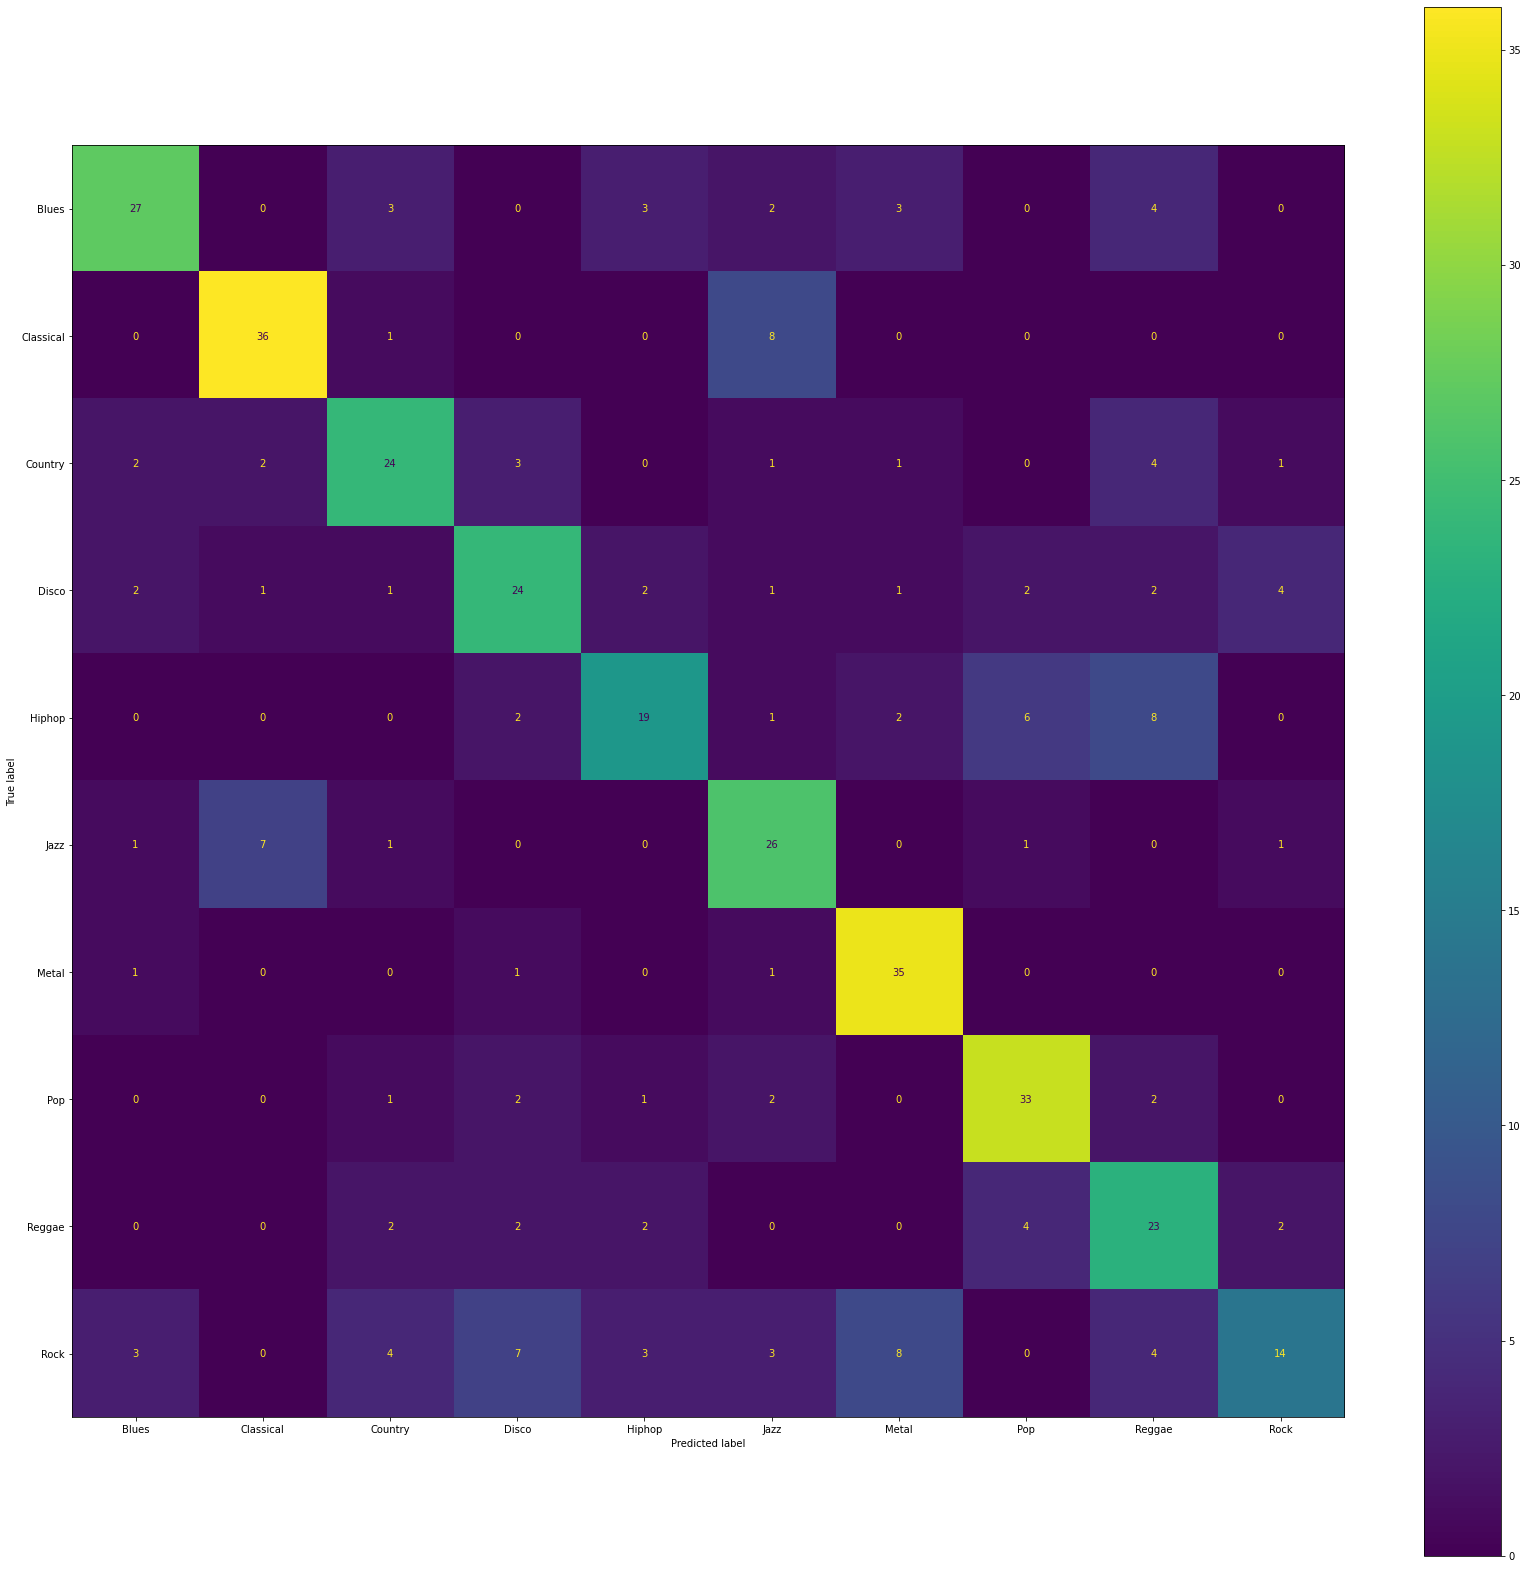

In [18]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from matplotlib.pyplot import figure


predictions = rf.predict(test_features)

print(accuracy_score(test_labels, predictions))

plot_confusion_matrix(rf, test_features, test_labels)
fig = plt.gcf()
fig.set_size_inches(28.5, 28.5)
plt.show()

import junix;
junix.export_images(filepath= "ClassificationTree.ipynb")